In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import
# ======

# essential libraries
import math
import random
from datetime import timedelta

# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import calmap # 설치
import folium # 설치

# color pallette
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 

# converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   

# hide warnings
import warnings
warnings.filterwarnings('ignore')


#한글깨짐 방지(0420)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import cufflinks as cf #설치(0420)
cf.go_offline(connected=True) #pandas와 같이 plotly에서도 간단한 시각화 지원

In [3]:
# for offline ploting
# ===================
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [4]:
path = '../covid'

In [5]:
os.chdir('data')
os.getcwd()

'C:\\Users\\student\\Desktop\\Dacon\\COVID\\DACON_COVID\\data'

In [6]:
file_name_list = os.listdir()
file_name_list

['Case.csv',
 'PatientInfo.csv',
 'PatientRoute.csv',
 'Region.csv',
 'SearchTrend.csv',
 'SeoulFloating.csv',
 'Time.csv',
 'TimeAge.csv',
 'TimeGender.csv',
 'TimeProvince.csv',
 'Weather.csv']

In [7]:
time = pd.read_csv('Time.csv')

In [8]:
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


<Figure size 576x360 with 0 Axes>

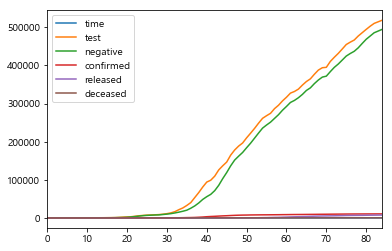

In [9]:
fig = plt.figure(figsize=(8,5))
fig.suptitle('Time')
time.plot()
plt.legend()
plt.show()

In [10]:
import plotly.graph_objects as go

fig = go.Figure() # Figure 객체 생성
fig.add_trace(go.Scatter(x=time['date'],y= time['released'],  # 그래프 하나씩 그리는 것
             mode='lines+markers', name='released'))
fig.add_trace(go.Scatter(x=time['date'],y= time['confirmed'],
             mode='lines+markers', name='confirmed'))
fig.add_trace(go.Scatter(x=time['date'],y= time['deceased'],
             mode='lines+markers', name='deceased'))

# layout 전체 그래프 틀 만들어주는 것
# <b> 볼드체 글쓰기
# color : 복사해서 구글에 치면 색깔 조절해서 해당 HEX가져올 수 있음
# family : 글씨체 > 지원되는 글씨체가 많이는 없는듯
fig.update_layout(title='<b>시간에 따른 확진자 추이</b>',
                   xaxis_title='Month',
                   yaxis_title='Number',
                 font=dict(size=18,color='#60606e',family='Franklin Gothic' ))
# iplot(fig)
fig.show()

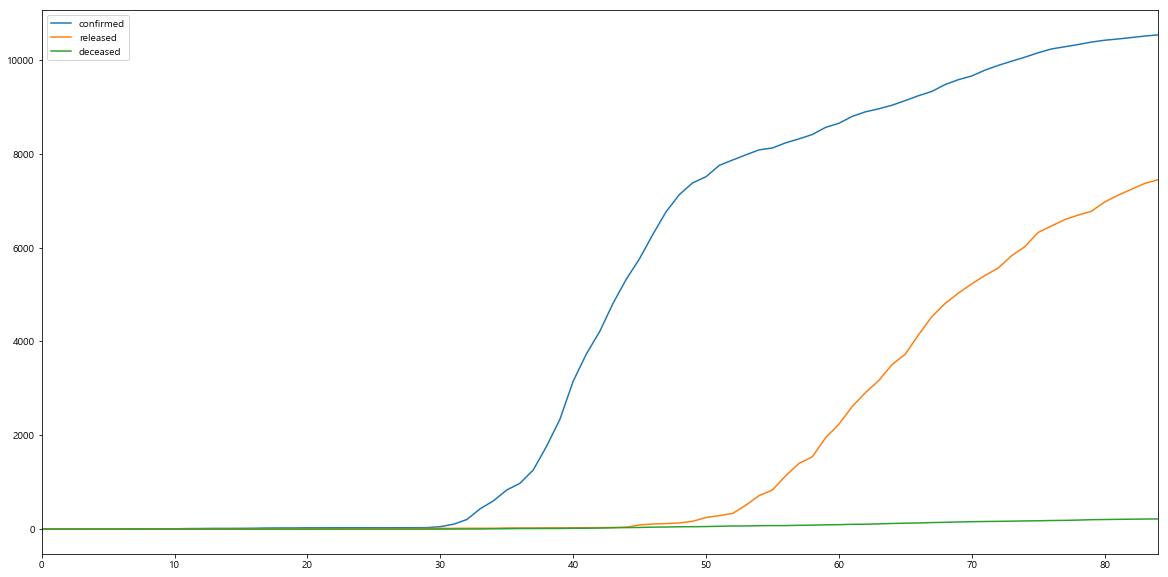

In [11]:
time[['confirmed','released','deceased']].plot(figsize=(20,10))

In [12]:
# px.line으로 데이터 plotly에 맞는 데이터 그리고 가져다 쓸수도 있는듯
# 정확히는 모르겠음

fig_1 = px.line(time, x='date', y='negative', color_discrete_sequence=[dth])
fig_2 = px.line(time, x='date', y='test', color_discrete_sequence=[rec])

fig = make_subplots(rows=1, cols=1, shared_xaxes=True)
fig.add_trace(fig_1['data'][0])
fig.add_trace(fig_2['data'][0])

fig.update_layout(title='<b>검사자 수와 음성판정자 수</b>',
                   xaxis_title='Month',
                   yaxis_title='Number',
                 font=dict(size=18,color='#60606e',family='Franklin Gothic' ))
fig.show()

In [13]:
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)
fig.add_trace(go.Scatter(x=time['date'],y= time['test']-time['negative'],
             mode='lines+markers', name='confirmed'))
fig.show()

"""
우한 바이러스 첫등장 11월14일 from 예언 ㅋㅋㅋ
우한지역 첫 확진자 발생 12월1일
국내 첫 확진자 1월 21일
대구 신천지 첫 확진자 2월17일 (31번)
"""

'\n우한 바이러스 첫등장 11월14일 from 예언 ㅋㅋㅋ\n우한지역 첫 확진자 발생 12월1일\n국내 첫 확진자 1월 21일\n대구 신천지 첫 확진자 2월17일 (31번)\n'

In [14]:
time.index = time.date
time_df=time.drop(['date','time'],axis=1,errors='ignore')

In [15]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=time['date'],y= time['released'],
             mode='lines+markers', name='released'))
fig.add_trace(go.Scatter(x=time['date'],y= time['confirmed'],
             mode='lines+markers', name='confirmed'))
fig.add_trace(go.Scatter(x=time['date'],y= time['deceased'],
             mode='lines+markers', name='deceased'))
fig.add_trace(go.Scatter(x=time['date'],y= time['confirmed']-time['released'],
             mode='lines+markers', name='isolated'))

# xaxes : 아래 네모 박스 시간단위로 하는 것 만들어주는 것
fig.update_xaxes(rangeslider_visible=True)

fig.update_layout(title='<b>시간에 따른 확진자 추이</b>',
                   xaxis_title='Month',
                   yaxis_title='Number',
                 font=dict(size=18,color='#60606e',family='Franklin Gothic' ))

# xaxes : 구조 조절하는 것
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=2, label="2m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

확진자가 급속하게 먼저 늘어나고 이후 완치된 사람들이 늘어감
확진자 증가 속도가 감소하면서 전체적인 숫자가 줄어드는 것을 확인할 수 있음

In [16]:
timeAge = pd.read_csv('timeAge.csv')
timeAge

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1
...,...,...,...,...,...
382,2020-04-13,0,40s,1401,3
383,2020-04-13,0,50s,1932,14
384,2020-04-13,0,60s,1335,32
385,2020-04-13,0,70s,698,64


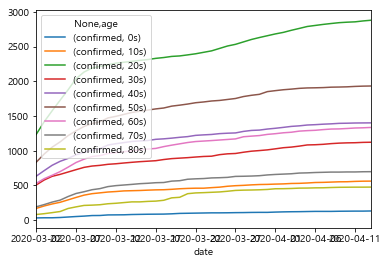

In [17]:
table = timeAge.pivot_table(index = ['date'],columns=['age'], aggfunc=sum)
table[['confirmed']].plot()

In [18]:
timeAge_Date = timeAge.pivot_table(index = ['date'],columns=['age'], aggfunc=sum)
timeAge_Date['confirmed'].head()

age,0s,10s,20s,30s,40s,50s,60s,70s,80s
date,,,,,,,,,
2020-03-02,32,169,1235,506,633,834,530,192,81
2020-03-03,34,204,1417,578,713,952,597,224,93
2020-03-04,34,233,1575,631,790,1051,646,260,108
2020-03-05,38,257,1727,659,847,1127,699,288,124
2020-03-06,45,292,1877,693,889,1217,763,340,168


In [19]:
fig = px.bar(timeAge, x='date', y='confirmed',
             hover_data=['age'], color='age', )
fig.show()

In [20]:
fig_1 = px.line(time, x='date', y='negative', color_discrete_sequence=[dth])
fig_2 = px.line(time, x='date', y='test', color_discrete_sequence=[rec])

fig = make_subplots(rows=1, cols=1, shared_xaxes=True)
fig.add_trace(fig_1['data'][0])
fig.add_trace(fig_2['data'][0])

fig.update_layout(title='<b>검사자 수와 음성판정자 수</b>',
                   xaxis_title='Month',
                   yaxis_title='Number',
                 font=dict(size=18,color='#60606e',family='Franklin Gothic' ))
fig.show()

In [21]:
# px쓰면 조금 더 간결하게 전체 여러 데이터 다룰 수 있는듯
# 하지만 maker : 라인에 점 찍혀있는 것을 할 수 없는 것 같음

fig = px.line(timeAge, x='date', y='confirmed',
              hover_data=['age'], color='age')

fig.update_layout(title='<b>연령별 확진자 수</b>',
                   xaxis_title='Month',
                   yaxis_title='Number',
                 font=dict(size=18,color='#60606e',family='Franklin Gothic' ))

fig.show()

In [22]:
timeAge_Date = timeAge.pivot_table(index = ['date'],columns=['age'], aggfunc=sum)
timeAge_Date['confirmed'].head()

import plotly.express as px
timeAge_Date['confirmed']

fig = go.Figure()
for col in timeAge_Date['confirmed'].columns:
    fig.add_trace(go.Scatter(x=timeAge_Date.index,y= timeAge_Date['confirmed'][col],
                 mode='lines+markers', name=col))
# ... #
fig.update_layout(title='<b>연령별 확진자 추이</b>',
                   xaxis_title='Month',
                   yaxis_title='Number',
                 font=dict(size=18,color='#60606e',family='Franklin Gothic' ))

fig.show()

> 의외로 확진자는 20대가 많다는 것을 볼 수 있음

> 70, 80대 확진자 숫자는 상당히 낮은편

> 10대는 확실히 돌아다니지 않고 학교 집 학원 이후 격리처리 집이라서 괜찮은듯

> 20대 일하던 여행하던 놀러다니던 돌아다니는 경우가 많아서 확실히 많음

> 50대는 왜 많은지 궁금함 관련 연구 필요할듯 은퇴자 or 주부 or 이유가 있을듯


In [23]:
timeAge_Date = timeAge.pivot_table(index = ['date'],columns=['age'], aggfunc=sum)
timeAge_Date['deceased'].head()

import plotly.express as px
timeAge_Date['deceased']

fig = go.Figure()
for col in timeAge_Date['deceased'].columns:
    fig.add_trace(go.Scatter(x=timeAge_Date.index,y= timeAge_Date['deceased'][col],
                 mode='lines+markers', name=col))
# ... #
fig.update_layout(title='<b>연령별 사망자 추이</b>',
                   xaxis_title='Month',
                   yaxis_title='Number',
                 font=dict(size=18,color='#60606e',family='Franklin Gothic' ))

fig.show()

나이가 많을 수록 사망자 수가 매우 높음
> 20대가 확진자 수가 월등히 많음에도 사망자 숫자 자체가 80, 70대에서 더 많은 것은
> 나이에 따른 사망확률이 매우 높음을 알 수 있다.

In [24]:
timeGender = pd.read_csv('timeGender.csv')
timeGender

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20
...,...,...,...,...,...
81,2020-04-11,0,female,6265,100
82,2020-04-12,0,male,4229,113
83,2020-04-12,0,female,6283,101
84,2020-04-13,0,male,4243,115


In [25]:
Gender_Date = timeGender.pivot_table(index = ['date'],columns=['sex'], aggfunc=sum)
Gender_Confirmed = Gender_Date['confirmed']
Gender_Deceased = Gender_Date['deceased']

ax3 = px.line(Gender_Confirmed, x=Gender_Confirmed.index, y=Gender_Deceased['female'],
             color_discrete_sequence=['#ff0d5f'], labels='Female')
ax4 = px.line(Gender_Confirmed, x=Gender_Confirmed.index, y=Gender_Deceased['male'],
             color_discrete_sequence=['#3370ff'], labels='Male')

fig = go.Figure()
fig = make_subplots(rows=1, cols=2,
                    horizontal_spacing= 0.08,
                   subplot_titles=('<b>남여 확진자 수</b>','<b>남여 사망자 수</b>'))

fig.add_trace(go.Scatter(x=Gender_Confirmed.index, y=Gender_Confirmed['male'],
                 mode='lines', name="Male"), row=1, col=1)
fig.add_trace(go.Scatter(x=Gender_Confirmed.index, y=Gender_Confirmed['female'],
                 mode='lines', name="Female"), row=1, col=1)

fig.add_trace(go.Scatter(x=Gender_Deceased.index, y=Gender_Deceased['male'],
                 mode='lines', name="Male", showlegend=False, line=dict(color='#3370ff')), row=1, col=2)
fig.add_trace(go.Scatter(x=Gender_Deceased.index, y=Gender_Deceased['female'],
                 mode='lines', name="Female", showlegend=False, line=dict(color='#ff0d5f')), row=1, col=2)

fig.update_layout(title='<b>성별 확진자 및 사망자 수</b>',
                   xaxis_title='Month',
                   yaxis_title='Number',
                 font=dict(size=18,color='#60606e',family='Franklin Gothic' ),
                 showlegend=True)
fig.show()

In [26]:
fig = go.Figure()
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)
fig.add_trace(go.Scatter(x=time['date'], y=time['negative'],
                        name='Negative', line=dict(color='#28ede0',width=3.5)))
fig.add_trace(go.Scatter(x=time['date'], y=time['test'],
                         name='Test', line=dict(color='#ffca45',width=3.5)))

fig.update_layout(title='<b>검사자 수와 음성판정자 수</b>',
                   xaxis_title='Month',
                   yaxis_title='Number',
                 font=dict(size=18,color='#60606e',family='Franklin Gothic' ))
fig.show()

여자 감염자 수가 높은 반면, 사망자 수는 크게 차이나지는 않음

In [27]:
timeProvince = pd.read_csv('TimeProvince.csv',)
timeProvince
timeProvince.columns

Index(['date', 'time', 'province', 'confirmed', 'released', 'deceased'], dtype='object')

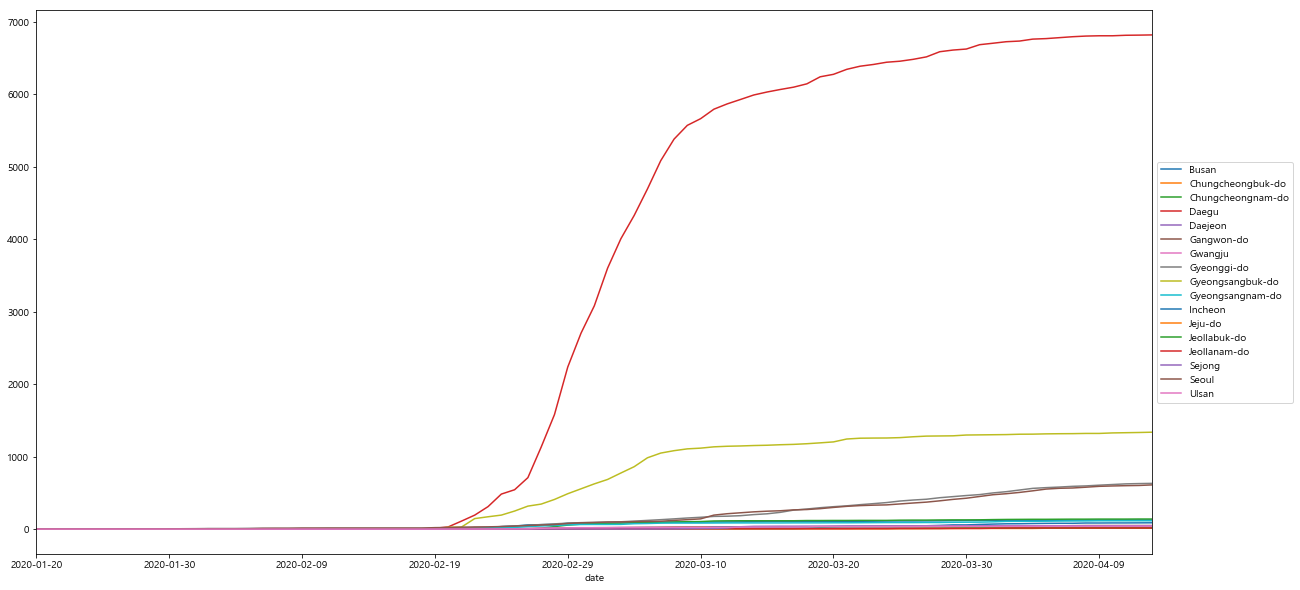

In [28]:
# 지역별 확진자 증가
Province_Date = timeProvince.pivot_table(index = ['date'], columns=['province'])
Province_Date['confirmed'].plot(figsize=(20,10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [29]:
many = Province_Date['confirmed'].iloc[-1].sort_values(ascending=False)
top = many[:7]
top

province
Daegu                6819
Gyeongsangbuk-do     1337
Gyeonggi-do           631
Seoul                 610
Chungcheongnam-do     139
Busan                 126
Gyeongsangnam-do      115
Name: 2020-04-13, dtype: int64

In [30]:
Province_Date.index[20:]

Index(['2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
       '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23',
       '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
       '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
       '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
       '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
       '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
       '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
       '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03',
       '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
       '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13']

In [31]:
# fig = make_subplots(rows=1, cols=1, subplot_titles=('<b>전지역 확진자 추이</b>','<b>Top 5 확진자 수 지역</b>'))
fig = go.Figure()

# for col in Province_Date['confirmed'].columns:
#     fig.add_trace(go.Scatter(x=Province_Date.index,y= Province_Date['confirmed'][col], mode='lines', name=col),row=1, col=1)

for col in list(top.index):
    fig.add_trace(go.Scatter(x=Province_Date.index[20:],y= Province_Date['confirmed'].ix[20:,col],
                 mode='lines', name=col, showlegend=True))
    
fig.update_layout(title='<b>확진자 상위 7개 지역의 추이</b>',
                   xaxis_title='Month',
                   yaxis_title='Number', 
                  font=dict(size=18,color='#60606e',family='Franklin Gothic'),
#                    width=1500,
#                     height=1500,
#                     margin=dict(
#                         l=50, r=50, b=50, t=100 ,pad=4 ),
#                   paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)'
                 )
fig.show()

https://plotly.com/python/mixed-subplots/

아 이런거 무조건 넣어야된다!!!!

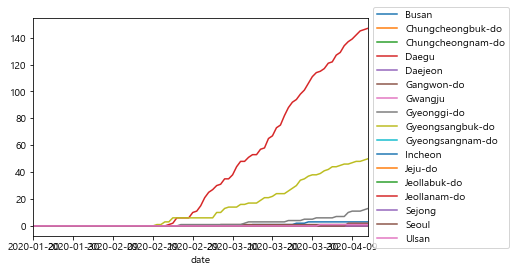

In [32]:
# 지역별 사망자 증가
table = timeProvince.pivot_table(index = ['date'], columns=['province'])
table['deceased'].plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# 확실히 사망자 대구가 많음
# 나중에 그래프 그릴때 지역별 색깔 통일해줘야겠다

In [33]:
DEFAULT_PLOTLY_COLORS=['rgb(31, 119, 180)', 'rgb(255, 127, 14)',
                       'rgb(44, 160, 44)', 'rgb(214, 39, 40)',
                       'rgb(148, 103, 189)', 'rgb(140, 86, 75)',
                       'rgb(227, 119, 194)', 'rgb(127, 127, 127)',
                       'rgb(188, 189, 34)', 'rgb(23, 190, 207)']

In [34]:
fig = make_subplots(rows=2, cols=1, subplot_titles=('<b>지역별 확진자 추이</b>','<b>지역별 사망자 추이</b>'))
                    
for i, col in enumerate(list(top.index)):
    fig.add_trace(go.Scatter(x=Province_Date.index[20:],
                             y= Province_Date['confirmed'].ix[20:,col],
                             mode='lines', name=col,
                            line=dict(color=DEFAULT_PLOTLY_COLORS[i], width=2)),row=1, col=1)

for i, col in enumerate(list(top.index)):
    fig.add_trace(go.Scatter(x=Province_Date.index[20:],
                             y= Province_Date['deceased'].ix[20:,col],
                             mode='lines', name=col, showlegend=False,
                             line=dict(color=DEFAULT_PLOTLY_COLORS[i], width=2)), row=2, col=1)
    

fig.update_xaxes(title_text="Month", row=1, col=1)
fig.update_xaxes(title_text="Month", row=2, col=1)
fig.update_yaxes(title_text="Number", row=1, col=1)
fig.update_yaxes(title_text="Number", row=2, col=1)

fig.update_layout(title='<b>확진자 상위 7개 지역의 추이</b>', height=800,
                  font=dict(size=18,color='#60606e',family='Franklin Gothic'))
for i in fig['layout']['annotations']:
    i['font'] = dict(size=18)
fig.show()

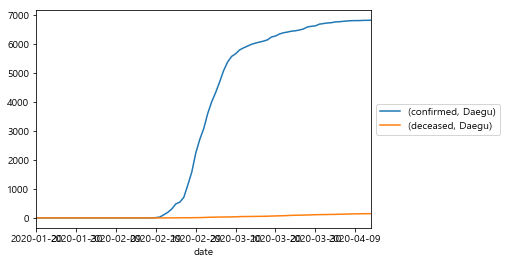

In [35]:
table[[('confirmed','Daegu'),('deceased','Daegu')]].plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [36]:
def percentage(a,b):
    return b*100/(a+b)

In [37]:
c, d = time[['confirmed','deceased']].sum()
percentage(c, d) # 전체 확진자 수 대바 사망자 비율 : 1.3139%

1.3139356892450709

In [38]:
a, b = table[[('confirmed','Daegu'),('deceased','Daegu')]].sum()
percentage(a, b) # 대구의 사망자 비율 : 1.3097 거의 유사함

1.3097500790429084

In [39]:
# 지역별로 보면
provinces = timeProvince['province'].unique()
for province in provinces:
    conv, decs = table[[('confirmed',province), ('deceased',province)]].sum()
    print(f'{province} 사망률 : {percentage(conv, decs):#.2f},\t\t 확진자수 : {conv:#.2f} ')
# 지역별 평균 연령이랑 엮어볼 수 있을 듯

Seoul 사망률 : 0.08,		 확진자수 : 15531.00 
Busan 사망률 : 1.23,		 확진자수 : 5202.00 
Daegu 사망률 : 1.31,		 확진자수 : 271563.00 
Incheon 사망률 : 0.00,		 확진자수 : 2009.00 
Gwangju 사망률 : 0.00,		 확진자수 : 929.00 
Daejeon 사망률 : 0.00,		 확진자수 : 1234.00 
Ulsan 사망률 : 0.86,		 확진자수 : 1502.00 
Sejong 사망률 : 0.00,		 확진자수 : 1448.00 
Gyeonggi-do 사망률 : 1.21,		 확진자수 : 16099.00 
Gangwon-do 사망률 : 2.44,		 확진자수 : 1517.00 
Chungcheongbuk-do 사망률 : 0.00,		 확진자수 : 1527.00 
Chungcheongnam-do 사망률 : 0.00,		 확진자수 : 5276.00 
Jeollabuk-do 사망률 : 0.00,		 확진자수 : 525.00 
Jeollanam-do 사망률 : 0.00,		 확진자수 : 367.00 
Gyeongsangbuk-do 사망률 : 2.25,		 확진자수 : 53987.00 
Gyeongsangnam-do 사망률 : 0.00,		 확진자수 : 4299.00 
Jeju-do 사망률 : 0.00,		 확진자수 : 303.00 


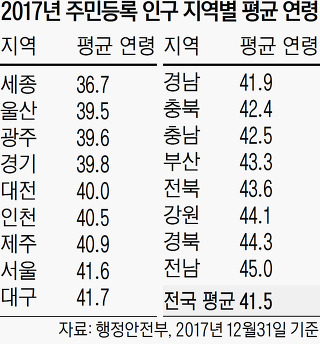

전남과 경북이 평균연령이 매우 높은 편임
전남의 경우는 확진자 수 자체가 매우 적어서 관리가 잘 되나? 일단 확진자가 적으니 사망자도 잘 안나옴
경북은 확진자 수 매우 높음 >> 이 이유를 연령과 연관지어 생각해 볼 수 있을 듯
2번째로 평균연령이 높은 곳

### 사망 원인에 대해서 알아봐야겠다는 의문점이생감

http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1IN1603
통계데이터 / 지역별 나이랑 성별 합쳐서 볼 수 있음

https://coronaboard.kr/
  코로나 보드 : 누가 해놓은 것 
  여기것 찾고해도 좋을듯 : 저기서 데이터 출처 적어놓은 곳에서
  전세계국가별 데이터 가져올 수 있을 것 같음

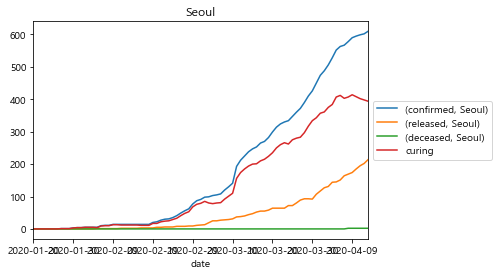

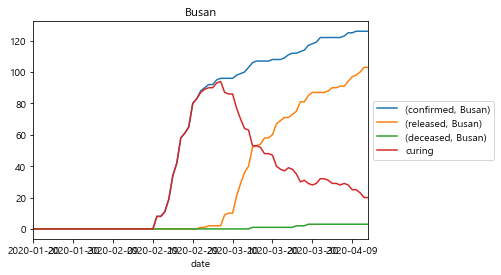

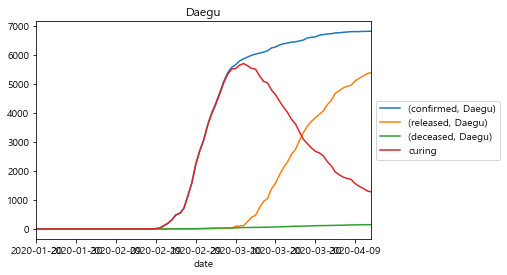

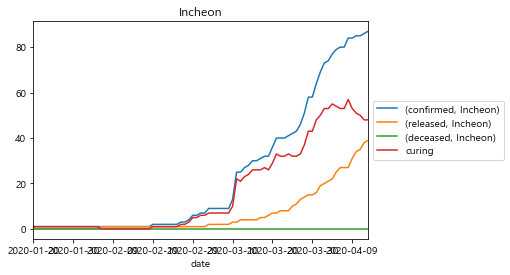

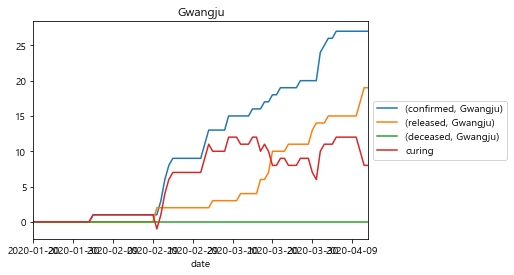

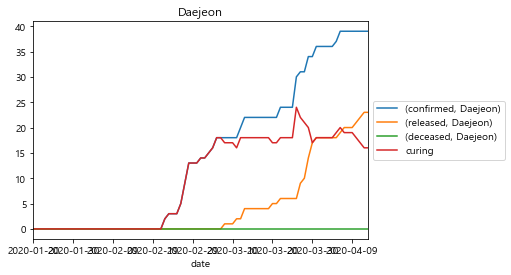

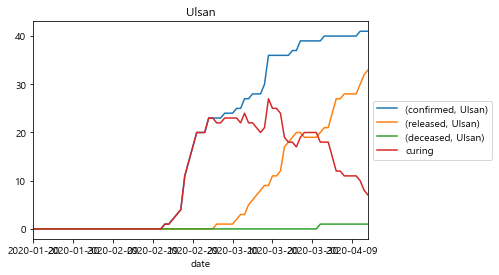

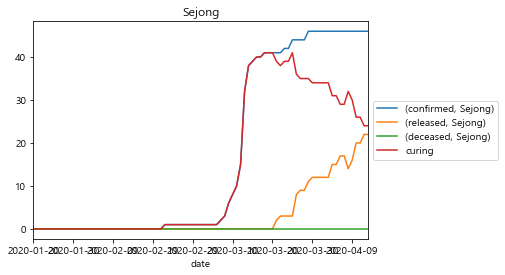

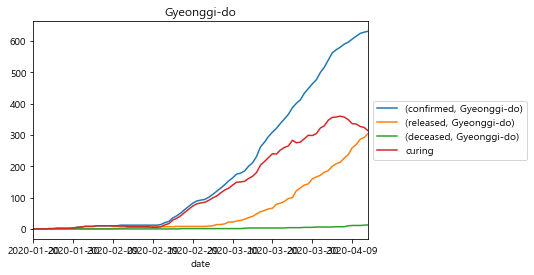

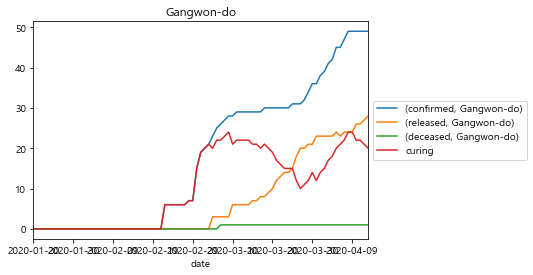

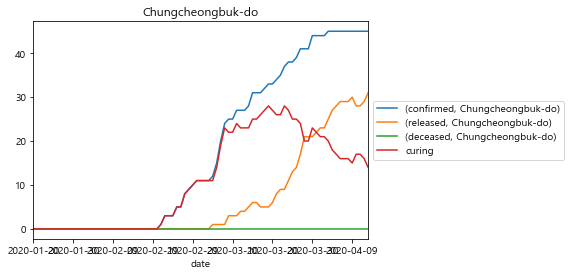

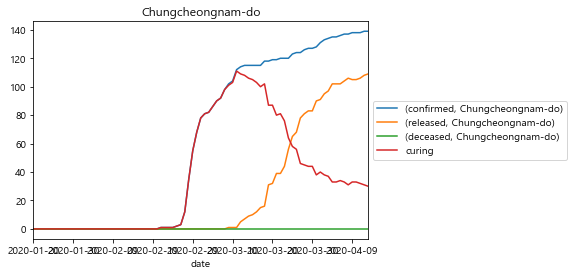

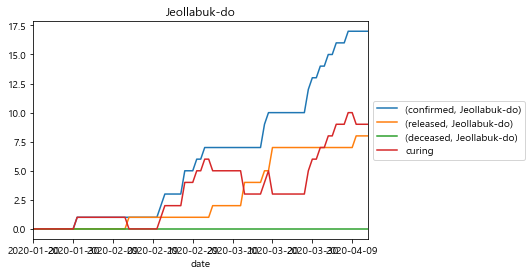

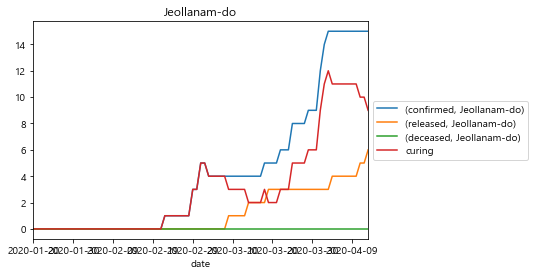

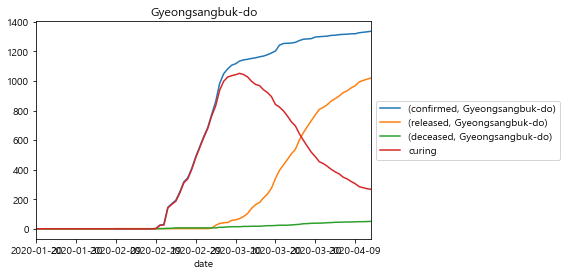

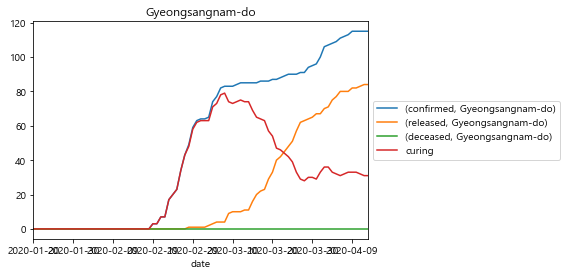

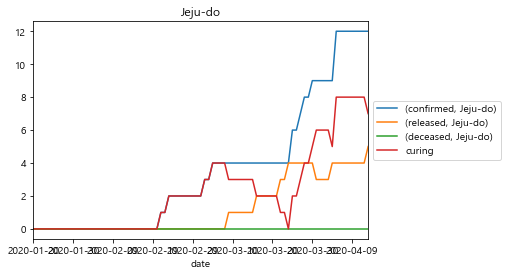

In [40]:
# 지역별로 그래프
provinces = timeProvince['province'].unique()
for province in provinces:
    table[[('confirmed',province), ('released',province), ('deceased',province)]].plot()
    (table[('confirmed',province)] - table[('released',province)] - table[('deceased',province)]).plot(label='curing')
    plt.title(province)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [41]:
timeProvince

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0
...,...,...,...,...,...,...
1440,2020-04-13,0,Jeollabuk-do,17,8,0
1441,2020-04-13,0,Jeollanam-do,15,6,0
1442,2020-04-13,0,Gyeongsangbuk-do,1337,1020,50
1443,2020-04-13,0,Gyeongsangnam-do,115,84,0


In [42]:
weather = pd.read_csv('Weather.csv')
weather

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9
...,...,...,...,...,...,...,...,...,...,...
25018,50000,Jeollabuk-do,2020-04-12,8.7,3.2,15.5,2.0,6.0,110.0,71.6
25019,51000,Jeollanam-do,2020-04-12,9.6,7.7,11.5,1.5,11.2,20.0,69.4
25020,60000,Gyeongsangbuk-do,2020-04-12,9.6,5.8,15.2,2.3,11.5,50.0,76.3
25021,61000,Gyeongsangnam-do,2020-04-12,8.8,6.4,13.0,6.9,7.0,50.0,73.3


In [43]:
# 온도는 어떻게 분석해야할지 모르겠네 ㅇㅅㅇ ;;;;
# 온도랑 1도 상관 없어보이는데 ...흠;;;
# 다른 많이 걸렸던 질병 데이터 구해서 날씨 온도에 따라 변한 것 보면서 비교한 다면 괜찮을 수 있는데
# 그게 아니면 그냥 여기서는 좀 애매해 보임

# 대구에 대해서
weather[weather['province']=='Daegu'].loc[:,'date':]

,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
2,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
18,2016-01-02,3.0,-2.7,9.9,0.0,2.6,250.0,74.8
34,2016-01-03,4.9,-2.3,13.9,0.0,2.3,110.0,77.0
50,2016-01-04,5.8,1.1,11.4,0.0,5.3,290.0,58.1
66,2016-01-05,2.9,0.9,5.9,0.0,4.0,270.0,29.4
...,...,...,...,...,...,...,...,...
24945,2020-04-08,12.2,7.1,18.8,0.0,6.4,290.0,45.0
24961,2020-04-09,10.3,3.0,17.5,0.0,6.4,110.0,55.5
24977,2020-04-10,11.0,8.2,15.0,0.0,4.2,140.0,60.8
24993,2020-04-11,10.6,5.8,15.2,0.1,4.0,270.0,69.3


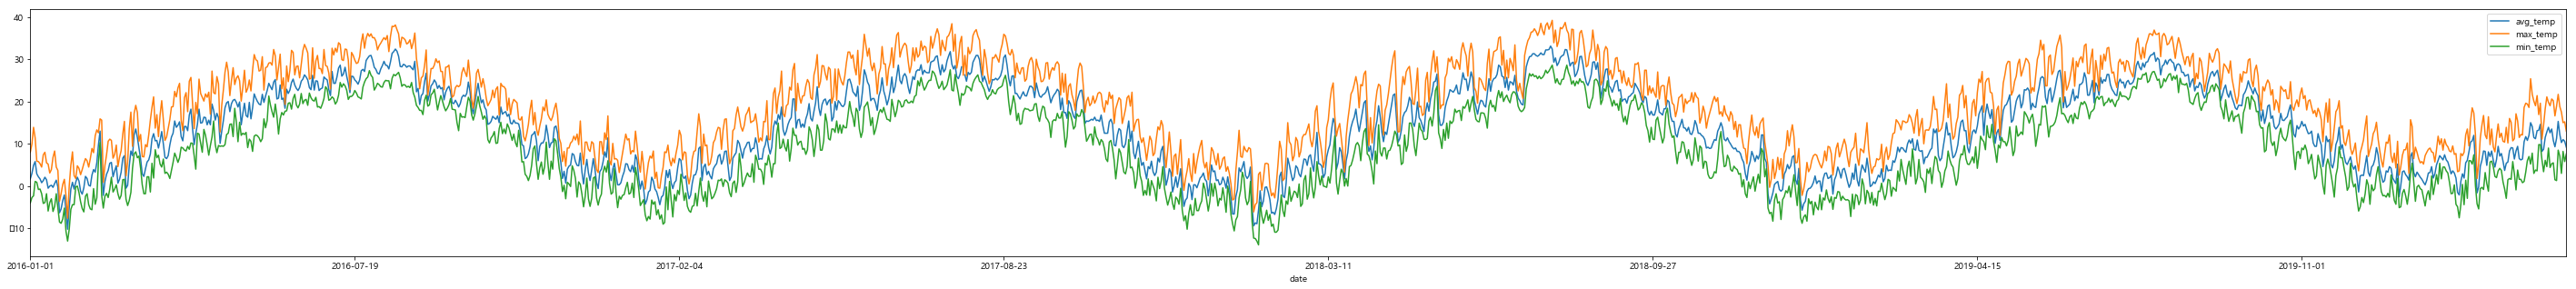

In [44]:
Dague = weather[weather['province']=='Daegu'].loc[:,'date':]
Dague.pivot_table(index='date').filter(regex='temp').plot(figsize=(50,5))

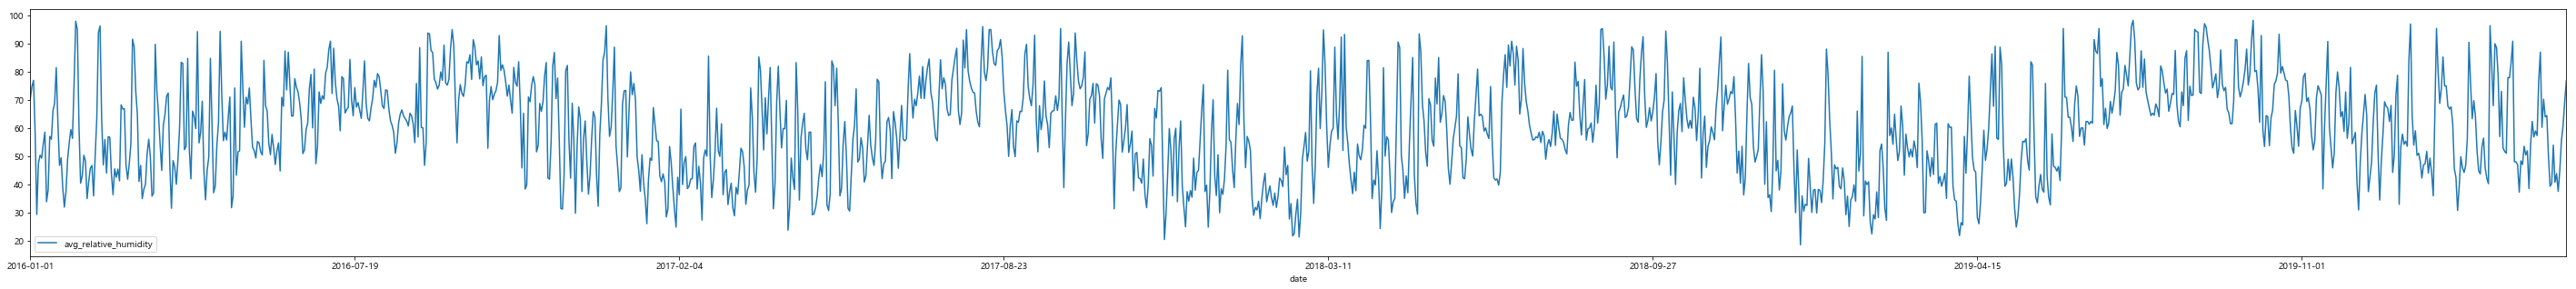

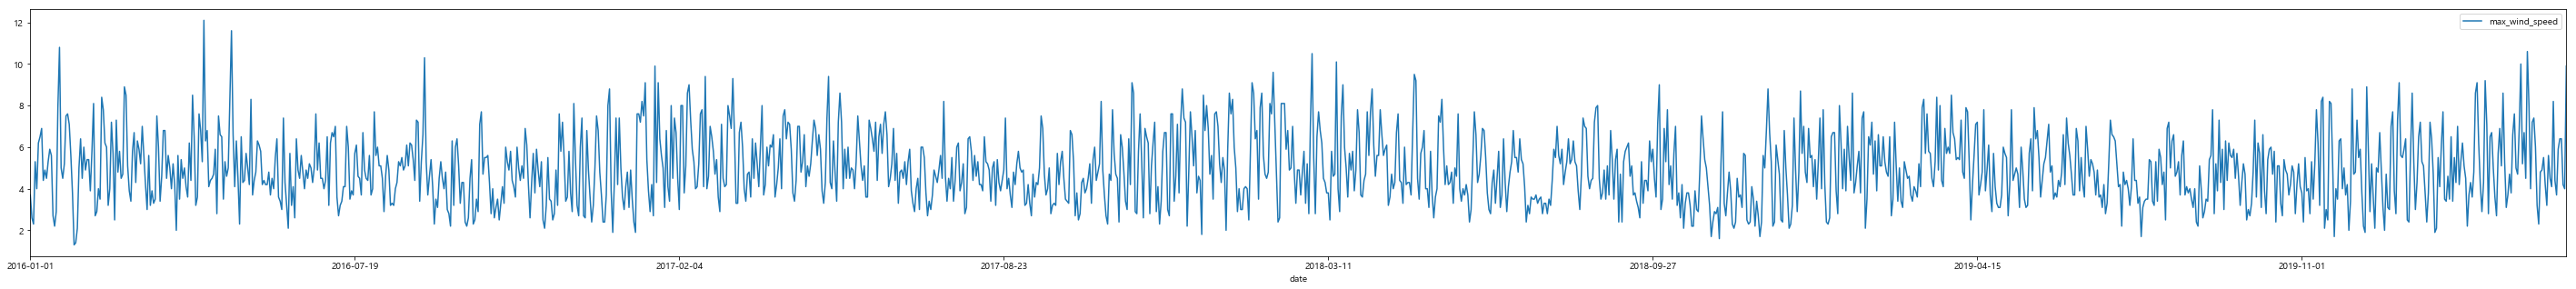

In [45]:
Dague.pivot_table(index='date').filter(regex='humidity').plot(figsize=(50,5))

Dague.pivot_table(index='date').filter(regex='wind_speed').plot(figsize=(50,5))
# 흠 애매하다 이런애들

# PatientInfo Data

### state( Isolated / Released / Deceased ) 중심의 EDA


- 1.1) 전체 state 비율
- 1.2) 연령대층에 따른 state 현황 
- 1.3) 성별에 따른 state 현황
- 1.4) State별 지역 환자 비율
- 1.5) 가장 높은 환자 비율의 지역들의 도시별 비율


- 2.1) 격리해제 환자(state=released)의 확진일(confirm date)과 격리해제 일(released date)까지의 소요 기간.
- 2.2) 사망 환자(state=deceased)의 확진일과 사망일 까지의 소요 기간.
-  cf) 격리 환자(state=isolated)는 격리가 진행중이기 때문에 released_date,deceased_date가 NaN.(제외) 
- 2.3) 연령층대별 평균이상 이하 소요기간


- 3.1) state에 따른 감염 경우 

In [46]:
p_info=pd.read_csv('PatientInfo.csv')

In [47]:
p_info

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,7000000008,9457.0,female,NaN,10s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,25.0,NaN,2020-03-27,NaN,NaN,isolated
3249,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3250,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3251,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,NaN,NaN,2020-04-03,NaN,NaN,isolated


## 1.1) 전체 State 비율 

In [48]:
fig=px.pie(total_state, values='state', names='index', title='[격리자/ 격리해제자 / 사망]', template = 'seaborn', color_discrete_sequence=px.colors.sequential.Reds_r)
fig.update_traces(rotation=90, pull=0.05, textinfo="value+percent+label")
fig.show()

NameError: name 'total_state' is not defined

## 1.2) 연령대층에 따른 state 현황

In [ ]:
state_age=p_info.groupby('state')['age'].value_counts()
state_age

In [ ]:
stage_age=pd.DataFrame(state_age)

In [ ]:
#연령대 컬럼명 변경
stage_age.rename(index={'0s':'0대','10s':'10대','20s':'20대','30s':'30대','40s':'40대','50s':'50대','60s':'60대','70s':'70대','80s':'80대','90s':'90대','100s':'100대'},inplace=True)

In [ ]:
stage_age

In [ ]:
stage_age=stage_age.T
stage_age=stage_age.drop(('isolated','100대'), axis=1, inplace=False) #격리된 연령층 100살대 1개 제외

In [ ]:
stage_age=stage_age.T

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(stage_age.loc['released',:].sort_index(), label='격리해제자', marker='o')
plt.plot(stage_age.loc['isolated',:].sort_index(), label='격리자', marker='o')
plt.plot(stage_age.loc['deceased',:].sort_index(), label='사망자', marker='o')
plt.title("연령대층에 따른 상태")
plt.legend()

#### 연령층별로 알아본 격리/ 격리해제/ 사망 상태

- 가장 많이 격리된 연령층도 20대 , 가장 많이 격리해제가 된 연령층도 20대
-  사망 연령층은 30대부터 시작, 80대가 가장 많음 

## 1.3) 성별에 따른 state

In [ ]:
state_sex=pd.DataFrame(p_info.groupby('state')['sex'].value_counts())

In [ ]:
state_sex

In [ ]:
state_sex.columns=['count']
state_sex=state_sex.reset_index()

In [ ]:
fig=px.bar(state_sex, x='state', y='count', color='sex',title='state별 남/여 비율')
fig.show()

In [ ]:
# p_info['country'].value_counts().plot.bar(figsize=(20,10)) #환자: 거의 한국인

## 1.4) 지역별에 따른 State 현황

In [ ]:
province_df=pd.DataFrame(p_info['province'].value_counts())

In [ ]:
province_df=province_df.reset_index()

In [ ]:
fig=px.pie(province_df, values='province', names='index', title='[전체 지역별 환자 수 및 비율(%)]', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
city_state=pd.DataFrame(p_info.groupby(['province','city'])['state'].value_counts())

In [ ]:
city_state

In [ ]:
city_state=city_state.unstack()
city_state=city_state.fillna(0)

In [ ]:
city_state

In [ ]:
deceased=pd.DataFrame(city_state.loc[:,'state'].loc[:,'deceased']).reset_index()
isolated=pd.DataFrame(city_state.loc[:,'state'].loc[:,'isolated']).reset_index()
released=pd.DataFrame(city_state.loc[:,'state'].loc[:,'released']).reset_index()

### 지역별 "격리해제" 환자 수 및 비율 

In [ ]:
fig=px.pie(released, values='released', names='province', title='[지역별 격리해제 환자 수 및 비율(%)]',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### 지역별 "격리 환자" 수 및 비율

In [ ]:
fig=px.pie(isolated, values='isolated', names='province', title='[지역별 격리 환자 수 및 비율(%)]',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### 지역별 "사망 환자" 수 및 비율

In [ ]:
fig=px.pie(deceased, values='deceased', names='province', title='[지역별 사망 환자 수 및 비율(%)]',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### 환자수가 가장 많은 상위 3개 지역 (경상북도, 경기도, 서울시)

#### 1위. 경상북도 

In [ ]:
city_state.loc['Gyeongsangbuk-do']

In [ ]:
#가장 환자 수가 많았던 경상북도의 city별 state현황 : 경산시가 압도적으로 사망자 수, 격리자 수, 격리해제 수 많음.

city_state.loc['Gyeongsangbuk-do'].iplot(kind='barh', barmode="stack",title='[ 경상북도 시/군별 state 현황 ]')

In [ ]:
city_state.loc['Gyeongsangbuk-do']

#### 경상북도 현황
- 경산시(대구시 바로 옆)가 압도적. 격리해제자가 생각보다 495명으로 많다. 
- 신천지 교회가 있는 대구 남구 보다 대구 바로 옆인 경산시에 사망자, 격리자가 훨씬 많음. ?? 대구시에 대한 정보가 부족한듯하다. 대구 외부 데이터 사용해야 할듯하다.

#### 추가 ) 대구시

In [ ]:
city_state.loc['Daegu'].iplot(kind='barh', barmode="stack",title='[ 대구광역시 구별 state 현황 ]')

In [ ]:
city_state.loc['Daegu']

#### 대구시
- 신천지 교회 소재지인 대구 남구에 사망자 1명, 격리자 7명 

#### 2위. 경기도 

In [ ]:
city_state.loc['Gyeonggi-do'].iplot(kind='barh', barmode="stack",title='[ 경기도 시별 state 현황 ]')

In [ ]:
city_state.loc['Gyeonggi-do']

#### 경기도 현황
- 경기도에는 성남시가 압도적으로 격리 환자 수(123명)가 많다.
- 사망자는 대체적으로 없고 남양주시에서만 1명 있다는 것 확인.
- 격리해제 환자도 대체적으로 거의 없음을 확인.  

#### 3위. 서울시 

In [ ]:
city_state.loc['Seoul'].iplot(kind='barh', barmode="stack",title='[ 서울특별시 구별 state 현황 ]')

#### 서울 현황
- 강남구 : 격리자(46명), 격리해제자(13명)
- 관악구 : 격리자(26명) , 격리해제자(16명)
- 서초구 : 격리자(26명), 격리해제자(9명)
- 송파구 : 격리자(24명), 격리해제자(13명)
- 구로구 : 격리자(23명), 격리해제자(11명) + 구로구 콜센터 집단감염과 연관?.
- 동작구 : 격리자(23명), 격리해제자(7명)
- 마포구 : 유일한 사망자: 1명, 격리자(13명), 격리해제자(8명)
.
.


## 2.1) 격리해제 환자(state=released)의 확진일(confirm date)과 격리해제 일(released date)까지의 소요 기간. 

In [ ]:
released_p=p_info[p_info['state']=='released']
released_p

In [ ]:
#격리해제자인데 격리해제된날 NaN인 사람 : 304명 제외 => drop
released_p['released_date'].isnull().sum()

In [ ]:
released_p=released_p.dropna(subset=['released_date'], inplace=False)

In [ ]:
released_p

In [ ]:
import re

confirm_list=[]
released_list=[]

for date in released_p['confirmed_date']:
    r= re.compile('(?P<year>\d+)[-](?P<month>\d+)[-](?P<date>\d+)')
    confirm_list.append(r.sub('\g<year>\g<month>\g<date>',date))

for date in released_p['released_date']:
    r= re.compile('(?P<year>\d+)[-](?P<month>\d+)[-](?P<date>\d+)')
    released_list.append(r.sub('\g<year>\g<month>\g<date>',date))

released_p['confirmed_date']=confirm_list 
released_p['released_date']=released_list

released_p['confirmed_date']=released_p['confirmed_date'].astype(int)
released_p['released_date']=released_p['released_date'].astype(int)

In [ ]:
released_p['period_diff']=released_p['released_date']-released_p['confirmed_date']

In [ ]:
released_p

In [ ]:
released_p['period_diff'].describe() 

### 결과 

- 평균: 65.7일
- 최대: 190일
- 최소: 0일? 만에 격리해제 

In [ ]:
fig=px.pie(over_av, values='count', names='age', title='[연령대별 확진날짜~격리해제 소요기간 (평균이상)]', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(rotation=90, pull=0.05, textinfo="value+percent+label")
fig.show()

In [ ]:
fig=px.pie(under_av, values='count', names='age', title='[연령대별 확진날짜~격리해제 소요기간 (평균이하)]', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(rotation=90, pull=0.05, textinfo="value+percent+label")
fig.show()

In [ ]:
#0일만에 격리해제된 사람: 20대 남성(97년생, 경기도 수원시, 환자와의 접촉)
released_p[released_p['period_diff']==0]

In [ ]:
#최대일수 190일만에 격리해제된 사람: 20대 여성(91년생, 경산시, 신천지교회에서 감염) 
released_p[released_p['period_diff']==190]

## 2.2) 사망자(state=deceased)의 확진일과 사망일 까지의 소요 기간

In [ ]:
deceased_p=p_info[p_info['state']=='deceased']
deceased_p=deceased_p.dropna(subset=['deceased_date'], inplace=False)

In [ ]:
deceased_p

In [ ]:
confirm_list=[]
released_list=[]

for date in deceased_p['confirmed_date']:
    r= re.compile('(?P<year>\d+)[-](?P<month>\d+)[-](?P<date>\d+)')
    confirm_list.append(r.sub('\g<year>\g<month>\g<date>',date))

for date in deceased_p['deceased_date']:
    r= re.compile('(?P<year>\d+)[-](?P<month>\d+)[-](?P<date>\d+)')
    released_list.append(r.sub('\g<year>\g<month>\g<date>',date))

deceased_p['confirmed_date']=confirm_list 
deceased_p['deceased_date']=released_list

deceased_p['confirmed_date']=deceased_p['confirmed_date'].astype(int)
deceased_p['deceased_date']=deceased_p['deceased_date'].astype(int)

In [ ]:
deceased_p['period_diff']=deceased_p['deceased_date']-deceased_p['confirmed_date']

In [ ]:
deceased_p['period_diff'].describe()

In [ ]:
deceased_p[deceased_p['period_diff']==-1] 
#청도대남병원에서 사후판정 2명 사망자 : 질병여부 0, 청도대남병원에서 사망. => 신천지 발생 이후 사망, 청도대남병원으로 확진자들 대거 유입되면서 걸렸을 수 있겠음. 

In [ ]:
deceased_p[deceased_p['patient_id']==6020100104]

In [ ]:
deceased_p[deceased_p['disease']==True]

## 2.3) 연령층대별 평균이상 이하 소요기간

#### 평균 66일을 기준으로 평균이상, 이하인 환자들로 나누어 더 자세히 알아보았습니다.

In [ ]:
released_p['over_aveg']=np.where(released_p['period_diff']>66,1,0)

In [ ]:
over_av_released=released_p[released_p['over_aveg']==1]
under_av_released=released_p[released_p['over_aveg']==0]

In [ ]:
released_p['age'].value_counts().sort_index()

In [ ]:
over_av=pd.DataFrame(over_av_released['age'].value_counts().sort_index()).reset_index()
under_av=pd.DataFrame(under_av_released['age'].value_counts().sort_index()).reset_index()

In [ ]:
#연령대층별로 감염자수가 확연히 다르기때문에 각 연령층별의 비율로 계산

under_av['per']=under_av['age']/(under_av['age']+over_av['age']) 
over_av['per']=over_av['age']/(under_av['age']+over_av['age'])

In [ ]:
#컬럼 재정리
under_av.columns=['age', 'count', 'per']
over_av.columns=['age', 'count', 'per']

In [ ]:
under_av

In [ ]:
over_av

#### 결과 
- 10대,20대,30대 들도 격리해제까지 걸리는 평균 기간 66일 이상이 60%를 넘는것을 보아 COVID-19는 쉽게 완치되지 않는 병임을 알 수 있었다.
- 평균일수를 넘는 비율이 가장 큰 연령층은 60대이며, 70%가 넘는다.

## 3.1) 감염 케이스에 따른 State 

In [ ]:
p_info['infection_case'].value_counts().plot.barh(figsize=(20,10))
#환자끼리와의 접촉이 가장 많음

In [ ]:
case_state=pd.DataFrame(p_info.groupby('infection_case')['state'].value_counts())

In [ ]:
case_state=case_state.unstack(level=0)

In [ ]:
case_state

In [ ]:
case_state.iplot(kind='barh', barmode="stack",title='state별 감염 케이스')

In [ ]:
#격리해제자 수/격리자 수/사망자 수 가장 많은 감염 경우 부터
p_info.groupby('infection_case')['state'].value_counts().sort_values(ascending=False)

#### 감염 케이스

- 격리해제자 : 다른환자와의 접촉(320명) > 기타(250명) > 신천지교회(69명) > 구로콜센터(58명) > 온천교회(28명) > 천안 체육관(25명) > ...

- 격리자 : 다른환자와의 접촉(582명) >  해외(469명) > 기타(262명) > 구로콜센터(53명) > 신천지교회(36명) > 봉화푸른요양원(30명) > ..

- 사망자 : 기타(13명) > 청도대남병원(7명) > 다른 환자와의 접촉(3명) > 신천지교회(2명) > 구로콜센터(1명) ..


- 결론: 다른환자와의 접촉 사례가 가장 큼, 최근 해외에서 온 격리자 수가 많아졌음을 알 수 있다.

# Route data


- 환자 이동장소 유형
- 확진자별 이동경로


In [ ]:
route=pd.read_csv('PatientRoute.csv')

In [ ]:
route

In [ ]:
route.shape

In [ ]:
route['patient_id'].value_counts() #총 939명의 환자의 동선

## 1) 환자 이동 장소 유형 

In [ ]:
type_infection=pd.DataFrame(route['type'].value_counts())
type_infection=type_infection.reset_index()

In [ ]:
fig=px.pie(type_infection, values='type', names='index', title='[환자 이동 장소 유형 수 및 비율(%)]')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

#### 감염자가 이동한 장소 

- 기타가 제일 높은 비율 차지. 기타가 뭘지일지는 외부데이터를 사용하여 두번째 Search Insight 로 분석 예정.
- 기타와 병원이 60%로 대부분의 비율 차지.

## 2) 확진자별 이동경로 

In [ ]:
#확진자가 방문한 위치 분포를 알아보기 위해 scatter형태로 표시

fig_map = px.scatter_mapbox(route, lat="latitude", lon="longitude",
                color_continuous_scale="Rainbow", size_max=50)
fig_map.update_layout(mapbox_style="carto-positron",width=900, height=700)
fig_map.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig_map.show()

# Case data 

- 위치별 확진 환자 수 분포

### 1) 위치별 확진 환자 수 분포   

In [ ]:
case=pd.read_csv('Case.csv')

In [ ]:
case

In [ ]:
case.info() #latitude, longitude 자료형 object? float형으로 변환

In [ ]:
case[['latitude','longitude']]=np.where(case[['latitude','longitude']]=='-',None,case[['latitude','longitude']])

In [ ]:
case[['latitude','longitude']]=case[['latitude','longitude']].astype(float)

In [ ]:
fig_map = px.scatter_mapbox(case, lat="latitude", lon="longitude", color='case_id',
                color_continuous_scale="Rainbow", size='confirmed', size_max=50, zoom=7)
fig_map.update_layout(mapbox_style="carto-positron",width=900, height=700)
fig_map.update_layout(margin={"r":0,"t":0,"l":0,"b":0}) #margin(layout 크기) 맞춤
fig_map.show()